In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('train.csv')

dataset = dataset.replace(["female", "male"] , [0, 1])
dataset = dataset.replace(["S", "C", "Q"], [0, 1, 2])
dataset = dataset.fillna(0)

y_train = dataset[["Survived"]]
x_train = dataset[["Pclass" , "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

y_train = np.array(y_train)
x_train = np.array(x_train)

In [0]:
model = tf.keras.models.Sequential([
        Dense(7, input_dim=7 ,activation="sigmoid"),
        Dense(8, activation="relu"),
        Dense(4, activation="sigmoid"),
        Dense(2, activation="softmax"),
])

In [0]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [22]:
output = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
28/28 [==============================] - 0s 1ms/step - loss: 0.7011 - accuracy: 0.6162
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6760 - accuracy: 0.6162
Epoch 3/200
28/28 [==============================] - 0s 996us/step - loss: 0.6649 - accuracy: 0.6162
Epoch 4/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6581 - accuracy: 0.6162
Epoch 5/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6542 - accuracy: 0.6162
Epoch 6/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6162
Epoch 7/200
28/28 [==============================] - 0s 986us/step - loss: 0.6464 - accuracy: 0.6162
Epoch 8/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6431 - accuracy: 0.6162
Epoch 9/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6400 - accuracy: 0.6162
Epoch 10/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.6162
Epoch

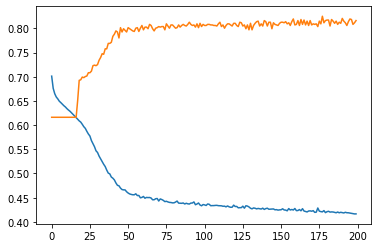

In [24]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.show()

In [0]:
dataset = pd.read_csv('test.csv')

dataset = dataset.replace(["female", "male"] , [0, 1])
dataset = dataset.replace(["S", "C", "Q"], [0, 1, 2])
dataset = dataset.fillna(0)

x_test = dataset[["Pclass" , "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]]

x_test = np.array(x_test)

In [0]:
dataset = pd.read_csv('gender_submission.csv')

y_test = dataset[["Survived"]]

y_test = np.array(y_test)

In [30]:
model.evaluate(x_test, y_test)

14/14 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8852


[0.28182029724121094, 0.8851674795150757]

In [34]:
jack = np.array([1,1,54,0,0,51.8625,0])

jack = jack.reshape(1, 7)

temp = model.predict(jack)

y_pred = np.argmax(temp, axis=1)
print(y_pred)

[1]
